In [40]:
# Computation Libraries
import numpy as np
import pandas as pd

# Stats Libraries
import statistics as stats

# Visualisazition Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Modelling Libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics Libraries
from sklearn.metrics import accuracy_score

In [18]:
# Importing Data
df = pd.read_csv("./Dataset/Clustering/Iris.csv")
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [23]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [27]:
len(df)

150

In [30]:
for i in range(len(df)):
    if(df['Species'].iloc[i] == 'Iris-setosa'):
        df['Species'].iloc[i] = 0
    elif(df['Species'].iloc[i] == 'Iris-versicolor'):
        df['Species'].iloc[i] = 1
    else:
       df['Species'].iloc[i] = 2

0


/tmp/ipykernel_12141/1582062527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species'].iloc[i] = 0


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


/tmp/ipykernel_12141/1582062527.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species'].iloc[i] = 1


59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


/tmp/ipykernel_12141/1582062527.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species'].iloc[i] = 2


120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [58]:
# Data Preparation
X = df.drop(["Id", "Species"], axis = 1)
Y = df["Species"].astype('int')

# Preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
train_x, test_x, train_y, test_y =  train_test_split(X,Y,test_size = 0.4, random_state =7)
print(X.shape,Y.shape, train_x.shape, test_x.shape, train_y.shape, test_y.shape)

# Train model
k = 4
model = KNeighborsClassifier(n_neighbors = k)
model.fit(train_x,train_y)

(150, 4) (150,) (90, 4) (60, 4) (90,) (60,)


KNeighborsClassifier(n_neighbors=4)

In [59]:
pred = model.predict(test_x)

In [60]:
from sklearn import metrics
print("Train set Accuracy: ", accuracy_score(train_y, model.predict(train_x)))
print("Test set Accuracy: ", accuracy_score(test_y, pred))

Train set Accuracy:  0.9444444444444444
Test set Accuracy:  0.9166666666666666


In [61]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(train_x,train_y)
    yhat=neigh.predict(test_x)
    mean_acc[n-1] = accuracy_score(test_y, yhat)

    
    std_acc[n-1]=np.std(yhat==test_y)/np.sqrt(yhat.shape[0])

mean_acc

array([0.93333333, 0.9       , 0.93333333, 0.91666667, 0.91666667,
       0.93333333, 0.95      , 0.93333333, 0.93333333])

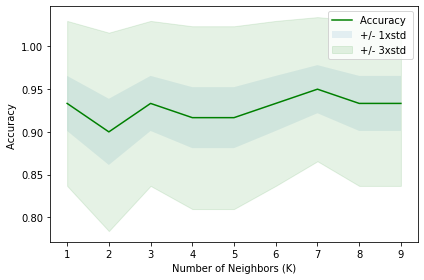

In [62]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [63]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.95 with k= 7
